# Map representation of the data

the code below is adapted from: https://machinelearningmastery.com/data-to-map-geospatial/

In [2]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

from src.config import (
    MAP_PRICES,    
    MAP_PRICES_AND_NANS,
    PALETTE,
    PLUS_LON_LAT_DATA,
    )


In [4]:
# Load the dataset
df = pd.read_csv(PLUS_LON_LAT_DATA)

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [6]:
# Set the CRS for the GeoDataFrame
geo_df.crs = "EPSG:4326"

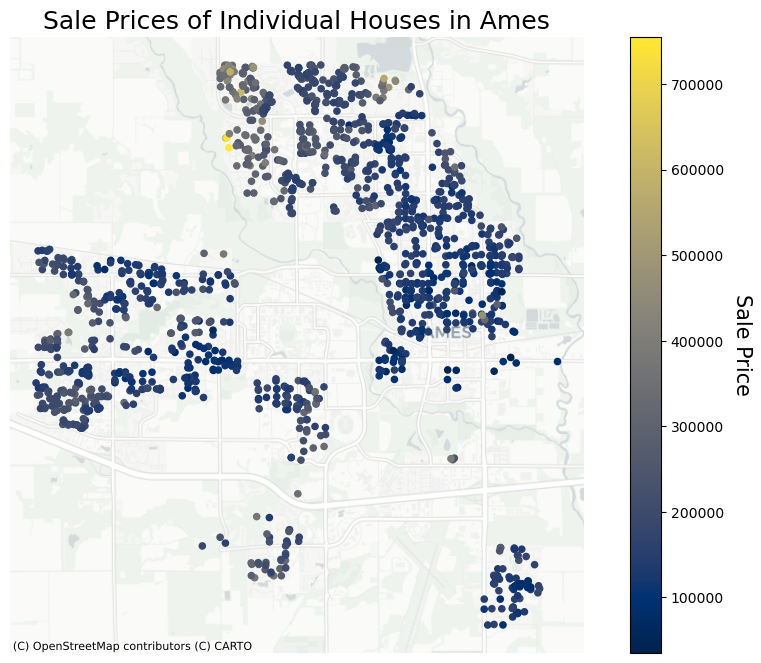

In [8]:
# Plotting the map with Sale Prices, a basemap
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.to_crs(epsg=3857).plot(column='SalePrice', cmap=PALETTE, ax=ax, legend=True, 
                              markersize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
colorbar = ax.get_figure().get_axes()[1]
colorbar.set_ylabel('Sale Price', rotation=270, labelpad=20, fontsize=15)
plt.title('Sale Prices of Individual Houses in Ames', 
          fontsize=18)
plt.show()
fig.savefig(MAP_PRICES, dpi=100, bbox_inches='tight')

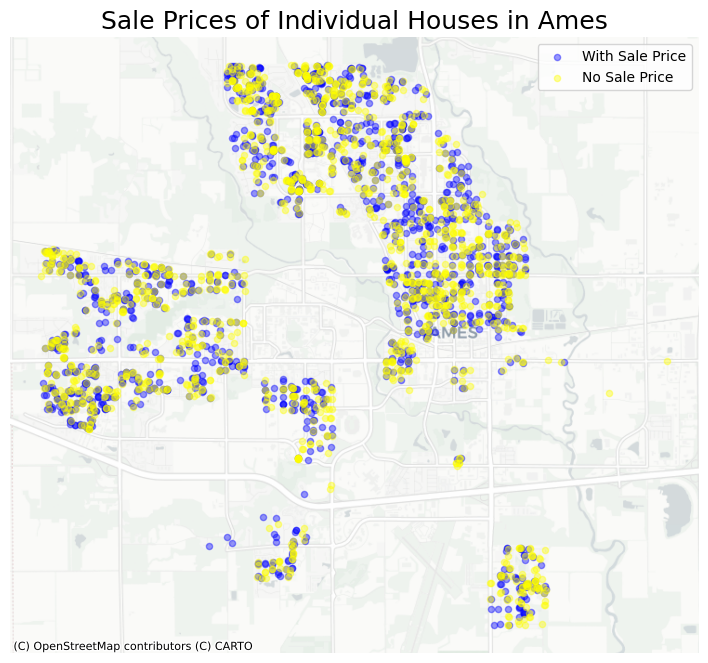

In [12]:
# Define custom color and transparency for each category
color_with_price = 'blue'
color_nan_price = 'yellow'
alpha_value = 0.4  # Adjust transparency from 0 (fully transparent) to 1 (fully opaque)

# Create a new column to classify houses based on SalePrice availability
geo_df['price_status'] = geo_df['SalePrice'].notna()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
# Plot houses with a valid SalePrice
geo_df[geo_df['price_status']].to_crs(epsg=3857).plot(color=color_with_price, ax=ax, markersize=20, alpha=alpha_value, label='With Sale Price')
# Plot houses with NaN SalePrice
geo_df[~geo_df['price_status']].to_crs(epsg=3857).plot(color=color_nan_price, ax=ax, markersize=20, alpha=alpha_value, label='No Sale Price')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

# Add legend
plt.legend()
plt.title('Sale Prices of Individual Houses in Ames', fontsize=18)
plt.show()
fig.savefig(MAP_PRICES_AND_NANS, dpi=100, bbox_inches='tight')